<a href="https://colab.research.google.com/github/Bragmotik/laboratory/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Яковлева Ольга
АДЭУ-201
> 2 вариант



In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving coursea_data.csv to coursea_data (3).csv


In [4]:
data=pd.read_csv('coursea_data.csv')
data.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [5]:
# для удобства переименовала некоторые столбцы
data.rename(columns={'Unnamed: 0' : '№', 'course_students_enrolled' : 'enrolled students(k)'}, inplace=True)

In [6]:
# преобразовдла столбец с нумерацией курсов в индекс и сортировала последний
data=data.set_index('№')
data=data.sort_index()

In [7]:
# убрала букву k--тысяча, чтобы данные можно было преобразовать в численные
data['enrolled students(k)']=data['enrolled students(k)'].str.replace(r'k',"")
data

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,enrolled students(k)
№,,,,,,
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350
...,...,...,...,...,...,...
886,Understanding Modern Finance,American Institute of Business and Economics,SPECIALIZATION,4.4,Intermediate,11
887,Object-Oriented Design,University of Alberta,COURSE,4.7,Intermediate,33
888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6.6


In [8]:
# убрала букву m--миллион, чтобы данные можно было преобразовать в численные
data['enrolled students(k)'].loc[2]=2500
data['enrolled students(k)'].loc[3]=1500
data['enrolled students(k)'].loc[6]=3200
data['enrolled students(k)'].loc[47]=1300

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
data

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,enrolled students(k)
№,,,,,,
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350
...,...,...,...,...,...,...
886,Understanding Modern Finance,American Institute of Business and Economics,SPECIALIZATION,4.4,Intermediate,11
887,Object-Oriented Design,University of Alberta,COURSE,4.7,Intermediate,33
888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6.6


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   course_title             891 non-null    object 
 1   course_organization      891 non-null    object 
 2   course_Certificate_type  891 non-null    object 
 3   course_rating            891 non-null    float64
 4   course_difficulty        891 non-null    object 
 5   enrolled students(k)     891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 88.7+ KB


In [11]:
data['enrolled students(k)']=data['enrolled students(k)'].astype('float64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   course_title             891 non-null    object 
 1   course_organization      891 non-null    object 
 2   course_Certificate_type  891 non-null    object 
 3   course_rating            891 non-null    float64
 4   course_difficulty        891 non-null    object 
 5   enrolled students(k)     891 non-null    float64
dtypes: float64(2), object(4)
memory usage: 88.7+ KB


# 1. Box plots.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


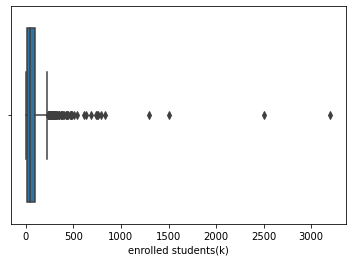

In [150]:
sns.boxplot(data['enrolled students(k)'])

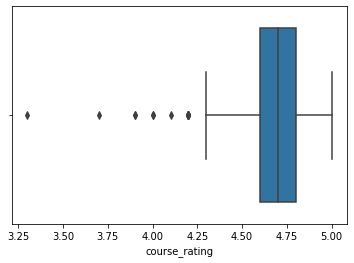

In [152]:
sns.boxplot(x="course_rating", data = data)


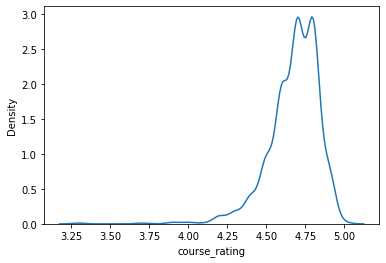

In [154]:
sns.kdeplot(data['course_rating'])

# 2. Violin plot.


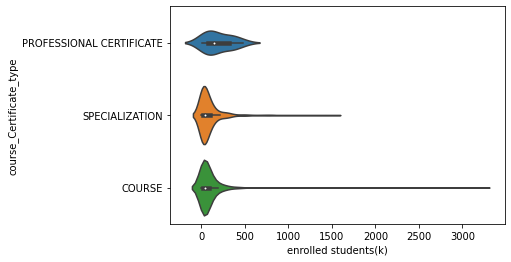

In [157]:
sns.violinplot(y="course_Certificate_type", x = 'enrolled students(k)', data=data)

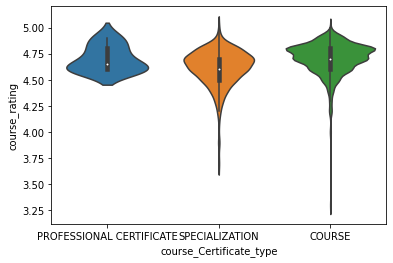

In [155]:
sns.violinplot(x="course_Certificate_type", y = 'course_rating', data=data)

# 3. Count plots.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


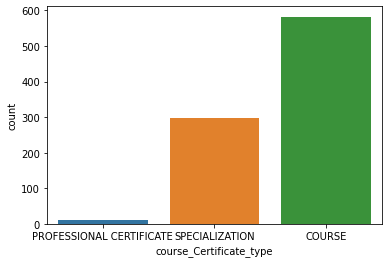

In [158]:
sns.countplot(data['course_Certificate_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


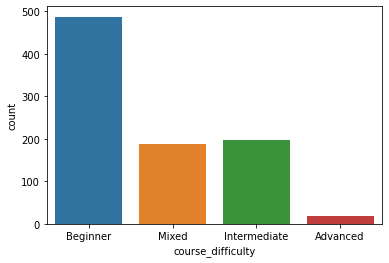

In [159]:
sns.countplot(data['course_difficulty'])

# 4. Heatmap.


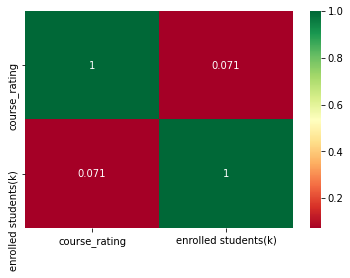

In [163]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

# 5. Facet grid.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


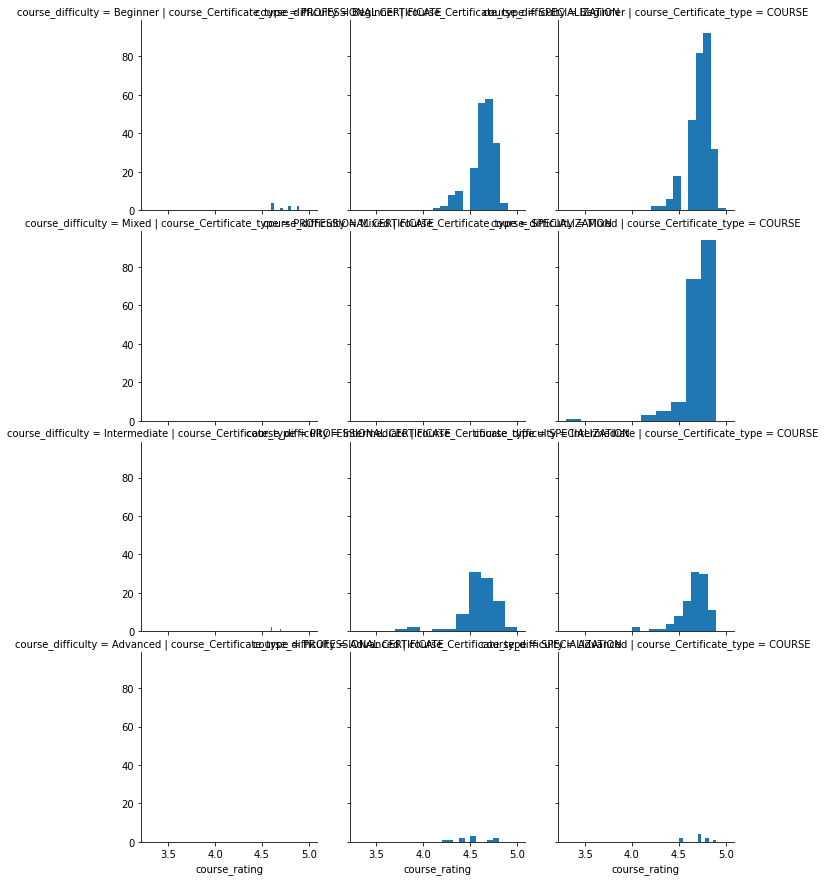

In [15]:
g = sns.FacetGrid(data, col="course_Certificate_type", row="course_difficulty")
g = g.map(plt.hist, "course_rating")

# 6. Regplot.


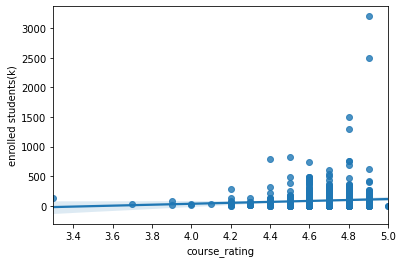

In [22]:
sns.regplot(y='enrolled students(k)', x='course_rating', data=data)

# 7. lmplot.


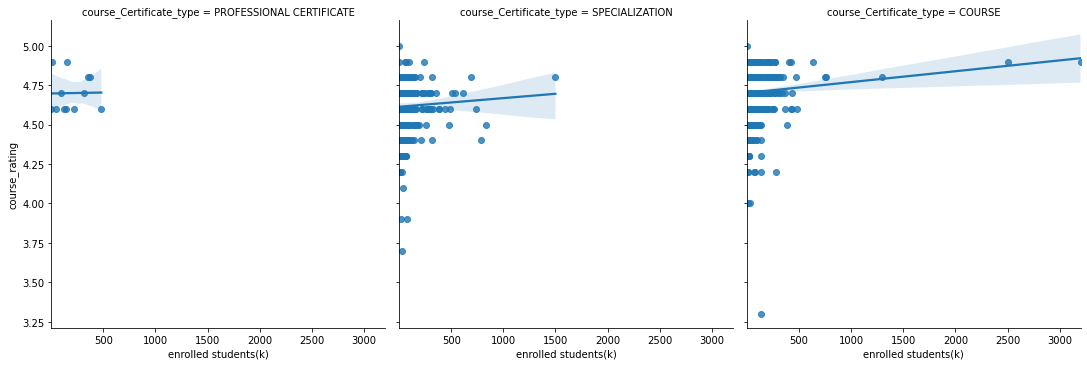

In [23]:
sns.lmplot(x="enrolled students(k)", y = 'course_rating', data=data, col='course_Certificate_type')

# 8. Swarm plot


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


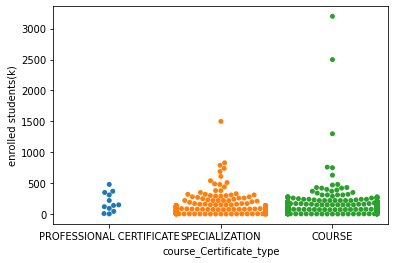

In [27]:
sns.swarmplot(y='enrolled students(k)', x='course_Certificate_type', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


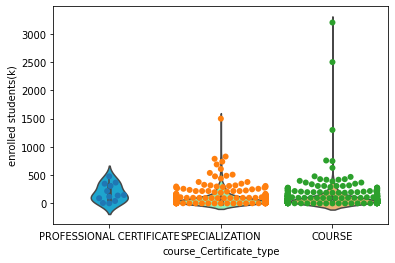

In [33]:
sns.violinplot(y='enrolled students(k)', x='course_Certificate_type', data=data, palette='rainbow')
sns.swarmplot(y='enrolled students(k)', x='course_Certificate_type', data=data, size=6)

# 9. Pair plot


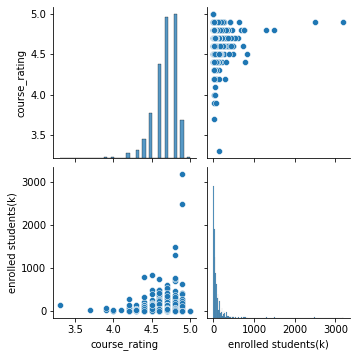

In [34]:
sns.pairplot(data=data)

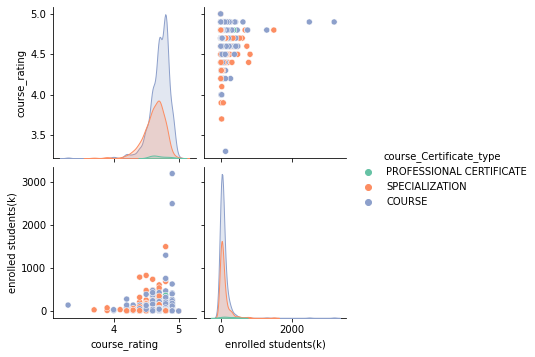

In [38]:
sns.pairplot(data, hue='course_Certificate_type', palette='Set2')


# 10. Joint plot

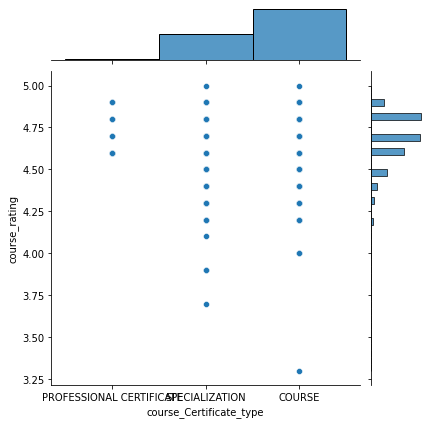

In [46]:
sns.jointplot(y='course_rating', x='course_Certificate_type', data=data)